In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
STANFORD_URL = 'https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/3-Combining-Images/HDR/stlouis_high/'
IMAGE_NAMES = [
    'aa.jpg',
    'bb.jpg',
    'cc.jpg',
    'dd.jpg',
]
IMAGE_PATHS = [os.path.join(STANFORD_URL, img_name) for img_name in IMAGE_NAMES]

In [3]:
# Opencv imread does not support urls
imgs = [imread(i) for i in IMAGE_PATHS]

In [4]:
# Convert the images to BRG for opencv processing
cv_imgs = [i[..., ::-1] for i in imgs]

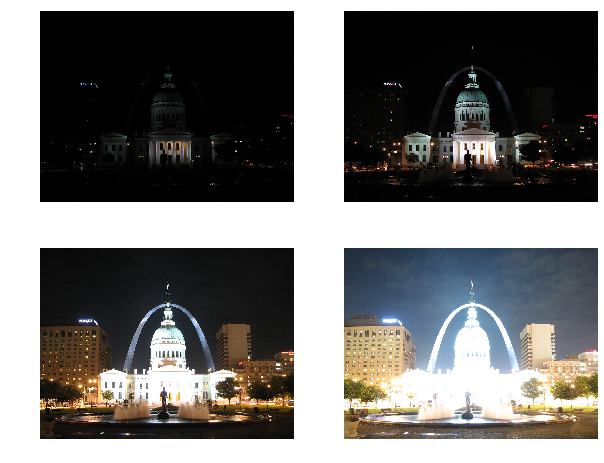

In [5]:
plt.figure(figsize=(10, 8))
for i, im in enumerate(imgs, 1):
    plt.subplot(2, 2, i)
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [6]:
mertens_merge = cv2.createMergeMertens()
exposure_fusion = np.clip(mertens_merge.process(cv_imgs), 0, 1)

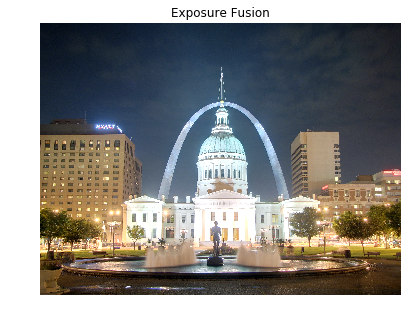

In [7]:
plt.figure(figsize=(15, 5))
plt.title(f'Exposure Fusion')
# Remember opencv gives BRG format
plt.imshow(exposure_fusion[..., ::-1])
plt.axis('off')
plt.show()